<img src="./img/logo_wiwi.png" width="23%" align="left">
<img src="./img/decision_analytics_logo.png" width="17%" align="right">

<br><br><br><br>


## Algorithmen und Datenstrukturen
Wintersemester 2022/23


# 6 Graphen und Breitensuche


<br><br><br>
J-Prof. Dr. Michael Römer, Till Porrmann 

# 1. Motivation

## Motivation: Von Twin Peaks zur Golden Gate Bridge

- wir stellen uns vor, dass wir uns bei **Twin Peaks** in San Francisco sind 
- wir möchten **zu Fuß** und **mit öffentlichen Verkehrsmitteln** zur **Golden Gate Bridge**
- und dabei **möglichst wenig umsteigen**

So sehen mögliche Fahrten aus:

<img src="./img/01_graph.png" width="70%" align="middle">


><div class="alert alert-block alert-info">
<b>Wie können wir vorgehen, um den Weg mit den wenigsten Schritten / Umstiegen zu finden?</b></div>

## Motivation: Von Twin Peaks zur Golden Gate Bridge

Können wir das Ziel in **einem** Schritt erreichen?

<img src="./img/02_schritt1.png" width="50%" align="middle">



Offenbar nein. Reichen **zwei** Schritte?

<img src="./img/03_schritt2.png" width="50%" align="middle">

## Motivation: Von Twin Peaks zur Golden Gate Bridge

Wieder nicht. Reichen **drei** Schritte?

<img src="./img/04_schritt3.png" width="50%" align="middle">


Ja! ...so sieht dann die gesamte Strecke aus:

<img src="./img/05_alle_schritte.png" width="50%" align="middle">

## Motivation: Von Twin Peaks zur Golden Gate Bridge

- unser Beispiel stellt ein vereinfachtes **Shortest Path** (kürzeste Wege)-Problem dar
- unser Vorgehen entspricht dem Prinzip der **Breitensuche**
- die Darstellung von Start, Ziel, Streckenabschnitten und Umsteigemöglichkeiten entspricht einem **Graphen**

.. dies sind die **Kernthemen der heutigen Veranstaltung!**

## Überblick über die heutige Veranstaltung

1. Motivation
2. Graphen
3. Breitensuche
4. Implementierung von Graphen
5. Implementierung der Breitensuche
6. Laufzeit der Breitensuche
7. Zusammenfassung

# 2. Graphen

## Was ist ein Graph?



Typischerweise bilden die Graphen **Verbindungen** oder **Beziehungen** zwischen **Elementen** (Knoten ab)

#### Beispiel: Alex schuldet Rick Geld beim Pokern 

<img src="./img/06_schulden1.png" width="30%" align="middle">


#### Intessanter wird es natürlich, wenn es mehrere Beziehungen gibt:

<img src="./img/07_schulden2.png" width="40%" align="middle">

## Was ist ein Graph?

Ein Graph besteht aus
- einer Menge von Knoten 
- einer Menge von Kanten

<img src="./img/08_knoten_kanten.png" width="25%" align="middle">

Ein Knoten, der direkt über eine Kante erreichbar sind, wird auch **Nachbar** oder **Nachfolger** genannt

## Gerichtete und ungerichtete Graphen

Wir unterscheiden
- **gerichtete Graphen**, in dem in dem die Kanten nur in einer Richtung durchlaufen werden kann bzw. die Beziehung / Verbindung nur in einer Richtung relevant ist 
  - Richtung wird üblicherweise mit Pfeilspitzen gekennzeichnet
  - bei den Nachbarknoten spricht man dann auch von **Nachfolgern** und **Vorgängern**
  - das Schulden-Beispiel
  - "A folgt B"-Beziehung in sozialen Netzwerken
- **ungerichtetete Graphen**, in denen die Beziehung symmetrisch ist, d.h. in denen die Richtung keine Rolle spielt
  - Bsp: ein Graph, der Beziehungen der Art "ist befreundet mit" in einem sozialen Netzwerk abbildet

<img src="./img/19_gerichtet_ungerichtet.png" width="50%" align="middle">

# 3. Breitensuche



## Suche in Graphen mittels Breitensuche
Bisher haben wir unter Suche die **Suche nach Werten in einer Liste** verstanden, z.B. mittels 
- linearer Suche
- binärer Suche

Nun beschäftigen wir uns mit der **Suche in Graphen**, inbesondere mit **der Suche nach Pfaden in Graphen**, d.h. mit Fragen wie
  1. Existiert ein Pfad von Knoten A nach Knoten B?
  2. Welcher Pfad von A nach B ist der kürzeste?

Hierzu nutzen wir zunächst das Prinzip der **Breitensuche**,
- das wir im Motivationsbeispiel schon kurz kennengelernt haben und
- nun etwas genauer betrachten werden

## Ein neues Beispiel: Die Suche nach einem Mango-Verkäufer




- Wir nehmen an, du **besitzt eine Mango-Plantage**
- um die Mangos zu verkaufen, **suchst du einen Mango-Händler**
- du versuchst, dein Facebook-Netzwerk für diese Suche zu nutzen
- du beginnst damit, deine direkten Freunde zu checken:

<center><img src="./img/09_personen.png" width="15%" align="middle"></center>

- dazu erstellst du zunächst eine Liste deiner Freunde:


 <center><img src="./img/10_liste.png" width="20%"></center>
    
- aus Graphen-Sicht entspricht das genau der Liste deiner Nachbarn (bzw. Nachfolger, wenn wir den Graph als gerichtet betrachten)

## Ein neues Beispiel: Die Suche nach einem Mango-Verkäufer

- nun gehst du die Liste durch: Gibt es einen Mangoverkäufer?

<center><img src="./img/11_ablauf.png" width="70%" align="middle"></center>

- es stellt sich heraus, dass keiner deiner Freunde Mangos verkauft

## Ein neues Beispiel: Die Suche nach einem Mango-Verkäufer

- versuchen wir es also mit den **Freunden deiner Freunde:**

<center><img src="./img/12_personen_groß.png" width="50%" align="middle"></center>

## Ein neues Beispiel: Die Suche nach einem Mango-Verkäufer

><div class="alert alert-block alert-info">
<b>Wie können wir das Durchsuchen der Freunde der Freunde in den Algorithmus einbauen?</b></div>


$\rightarrow$ indem wir für den Fall, dass ein\*e Freund\*in keine Mangos verkauft, deren Freunde in die Liste der zu durchsuchenden Personen aufnehmen!

<img src="./img/13_ablauf_alle.png" width="70%" align="middle">

- Wenn diese Liste nun nach dem **First-in-First-Out (FIFO)**-Prinzip abgearbeitet wird,
- handelt es sich um eine **Breitensuche** im Graph / Netzwerk deiner Freunde
- Beachte: Auf diese Weise wird das gesamte Netzwerk durchsucht!

## Breitensuche und Kürzeste Wege

Wenn möglich, möchtest du den Händler nehmen, der dir **am Nächsten** ist (den du über möglichst wenige Schritte kennst)

><div class="alert alert-block alert-info">
<b>Wie kann die Breitensuche hierfür genutzt werden?</b></div>


..interessanterweise passiert dies automatisch:

<img src="./img/14_graph_verbindungen.png" width="25%" align="middle">




..die Breitensuche erfolgt steigend im Sinne des Nachbarschaftsgrades!

<center>
<img src="./img/15_liste_verbindungen.png" width="15%" align="middle"> </center>


#### Beachte jedoch:
Die Breitensuche findet zwar den wenigsten Schritten zuerst, dies ist jedoch nicht automatisch der kürzeste Weg, wenn die Kanten unterschiedliche Längen haben!

## Breitensuche und "Warteschlangen"

Ein Kernelement der Breitensuche ist, dass die Knoten nach den **First-In-First-Out (FIFO)**-Prinzip abgearbeitet werden:
- der Knoten (im Beispiel: eine Person), der als erstes "gesehen" / "entdeckt" wurde, wird als erstes bearbeitet (gefragt, ob Mango-Verkäufer / gefragt nach weiteren Kontakten)
- auf diese Art funktionieren auch **Warteschlangen** (z.B. im Testzentrum)

<img src="./img/16_warteschlange.png" width="50%" align="middle">


><div class="alert alert-block alert-info">
<b>Es gibt auch eine Datenstruktur, die sich Warteschlange nennt. Welche Python-Datenstruktur, die Sie bereits kennen, würde sich eignen?</b></div>

## Abbildung der Warteschlange in Python
- Warteschlangen arbeiten nach dem FIFO-Prinzip
- hierzu können wir die Datenstruktur `deque` (double-ended queue), die wir bereits aus Teil 2 kennen, nutzen
  - anhängen einer Liste am Ende mittels `+=`
  - das erste Element herausnehmen mittels `popleft`
  


In [3]:
from collections import deque 

search_queue = deque()
search_queue.append("Du")
search_queue.append("Alice")
search_queue += ["Bob", "Peggy"]

In [10]:
search_queue.popleft()

'Du'

In [11]:
search_queue

deque(['Alice', 'Bob', 'Peggy'])

## FIFO und LIFO

- es gibt auch die Schlangediszipling LIFO (last in,  last out):

<img src="./img/17_fifo_lifo.png" width="50%" align="middle">

><div class="alert alert-block alert-info">
<b>Welche Datenstruktur ist geeignet, um eine LIFO-Abarbeitung abzubilden?</b></div>

# 4. Implementierung von Graphen

## Eine einfache Implementierung von (gerichteten) Graphen

- Graphen bilden Beziehungen zwischen Objekten / Elementen / Knoten ab
- es liegt nahe, eine Datenstruktur zu verwenden, die dies effizient kann: **die Hash-Tabelle**

### Kernidee dieser Implementierung:
- Graph als Hash-Tabelle, in der das Schlüssel-Wert-Paar wie folgt gebildet wird:
  - **Schlüssel:** Objekt / Knoten
  - **Wert:** Liste / Array mit Nachbarknoten / Nachfolgern
  

  
### Beispiel:

<img src="./img/09_personen.png" width="25%" align="middle">

In [63]:
graph = {}  # Erstellung der Hash-Tabelle

graph["Du"] = ["Alice", "Bob", "Claire"] # zentraler Knoten und Kanten auf die Nachfolger

# die anderen haben in diesem Ausschnitt keinen Nachfolger
graph["Alice"] = [] 
graph["Bob"] = []
graph["Claire"] = []

## Der gesamte Graph

<img src="./img/12_personen_groß.png" width="35%" align="middle">

In [8]:
graph = {}
graph["Du"] = ["Alice", "Bob", "Claire"]
graph["Bob"] = ["Anuj", "Peggy"]
graph["Alice"] = ["Peggy"]
graph["Claire"] = ["Tom", "Jonny"]
graph["Anuj"] = []
graph["Peggy"] = []
graph["Tom"] = []
graph["Jonny"] = []
graph

{'Du': ['Alice', 'Bob', 'Claire'],
 'Bob': ['Anuj', 'Peggy'],
 'Alice': ['Peggy'],
 'Claire': ['Tom', 'Jonny'],
 'Anuj': [],
 'Peggy': [],
 'Tom': [],
 'Jonny': []}

## Implementierung von Graphen: Allgemein

- Graphen können auf verschiedene Arten implementiert werden
- die Art und Effizienz einer Implementierung hängt ab von:
   - der Art des Graphen:
      - gerichtet vs ungerichtet
      - nur eine einzige oder mehrere (parallele) Kanten zwischen Knoten möglich (Multigraphen)
   - der Änderbarkeit des Graphen (können Knoten und Kanten gelöscht werden?)
   - den Zugriffsarten (braucht man sowohl eine Liste der eingehenden als auch der ausgehenden Kanten eines Knotens)
   - ...


## Ein Python-Paket für Graphen: NetworkX

Das Paket `networkx` (https://networkx.org/) bietet viele nützliche Funktionen und Strukturen für die Arbeit mit Graphen und Netzwerken
- verschiedene Graph-Typen (gerichtete, ungerichtete, ...)
  - Typ `Graph`: ungerichteter Graph
  - Typ `DiGraph`: gerichteter Graph
- viele Funktionen zum erstellen, iterieren durch und analysieren von Graphen
- Implementierungen für viele wichtige Graph-Algorithmen
- Visualisierungsfunktionen für Graphen



Anzahl  deiner Nachbarn: 3


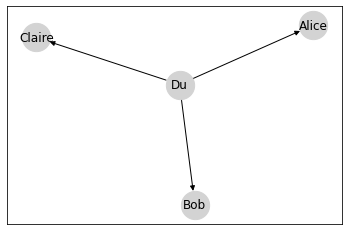

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph() # Lege das Graph-Objekt an

G.add_nodes_from(["Du", "Bob", "Claire", "Alice"]) # Erzeuge Knoten aus einer Liste

G.add_edge("Du","Bob") # Füge Kante hinzu
G.add_edge("Du","Claire")
G.add_edge("Du","Alice")

print("Anzahl  deiner Nachbarn:", G.out_degree("Du")) # out:degree = Anzahl ausgehender Kanten

nx.draw_networkx(G,node_size=800, node_color="lightgrey") # Zeichnen

# 5. Implementierung der Breitensuche

## Der Algorithmus im Überblick

<img src="./img/20_algorithmus_gesamt.png" width="40%" align="middle">

##  Illustrative Implementierung in Python

In [ ]:
## Achtung: Dieser Code dient nur zur Illustration der vorherigen Abbildung

# 1. Warteschlange mit Personen (eigentlich aus vorherigen Schritten!)
search_queue = deque(["Alice", "Bob", "Claire"]) 

# Falls noch Personen in der Schlange (Pfeil nach 5.)
while search_queue:   
      
    #2. Der Warteschlange wird eine Person entnommen (nach dem FIFO-Prinzip)
    person = search_queue.popleft() # das ist Alice
           
    #3. Handelt die Person mit Mangos?    
    if person_is_seller(person): # Funktion muss noch definiert werden!
        
        # 4.a Ja - fertig!
        print (person, " ist Mangohändler")
    else:
        
        #4.b: Alle Nachbarn hinzufügen
        search_queue += graph[person]
    
    # 5. Zum Schleifenanfang
    
# 6. Wenn die Schlage leer ist, gibt es keinen Händler im Netzwerk
    
    


## Eine "Dummy"-Implementierung der Funktion `person_is_seller`

- die Personen im Beispiel können wir nicht persönlich ansprechen

><div class="alert alert-block alert-info">
<b>Wie könnten wir für Personen speichern, ob sie Mangoverkäufer sind?</b></div>

...hier machen wir es uns ganz einfach:
- wir nehmen an, dass nur Personen, deren Name auf `m` endet, Mangos verkaufen

In [18]:
def person_is_seller(person):
    return person[-1] == 'm'

print("Tom: ", person_is_seller("Tom"))

print("Bob: ",person_is_seller("Bob"))

Tom:  True
Bob:  False


## Ein möglicher Ablauf


| Hier noch einmal der Graph: <img src="./img/12_personen_groß.png" width="100%" align="middle"> | <img src="./img/21_search_queue.png" width="95%" align="middle"> |
|:-|--|


## Vermeidung von Dopplungen / Endlosschleifen

..in unserem Ablauf wird als nächstes Bob bearbeitet

<img src="./img/22_dopplung.png" width="30%" align="right">

- er hat zwei Nachbarn (Nachfolger): Peggy und Anuj
- Peggy wurde allerdings schon einmal der Warteschlange hinzugefügt, d.h. Peggy käme zwei mal vor:

## Vermeidung von Dopplungen / Endlosschleifen

Im schlimmsten Fall haben wir einen Graphen, der einen **Zyklus** hat:

<img src="./img/23_beidseitig.png" width="40%" align="middle">

Dies würde zu einer **Endlosschleife** führen

<img src="./img/24_endlos.png" width="30%" align="middle">


><div class="alert alert-block alert-info">
<b>Wie lässt sich das doppelte Bearbeiten von Personen (Knoten) in der Breitensuche verhindern?</b></div>

## Vermeidung von Dopplungen / Endlosschleifen

<img src="./img/25_geprüft.png" width="15%" align="right">

Zur Vermeidung von Dopplungen sollten wir über die bereits bearbeiteten Personen / Knoten  "Buch führen":

><div class="alert alert-block alert-info">
<b>Welche Datenstruktur bietete sich dafür an?</b></div>

- im Buch "Algorithmen verstehen" wird vorgeschlagen, eine Python-`list` zu verwenden

><div class="alert alert-block alert-info">
<b>Halten Sie das für eine gute Idee? Wie lange dauert dabei das Einfügen / die Überprüfung?</b></div>


- ein besserer Ansatz wäre es, ein **set** zu verwenden!

## Ein Implementierungsvorschlag

Gegeben:
- ein Graph mit Personen und Beziehungen
- die Startperson (der Startknoten)

In [24]:
def search(graph, start_person):
    
    search_queue = deque( graph[start_person] ) # füge die Nachfolger der Startperson ein in die Schlange
    searched = set( [start_person] )  # füge die Startperson ein in die bereits durchsuchen Personen
    
    while search_queue:  # solange noch Personen in der Schlange sind
        person = search_queue.popleft() # nimm die erste Person aus der Schlange
        
        if not person in searched: # falls die Person noch nicht betrachtet wurde
            if person_is_seller(person): # falls die Person ein Verkäufer ist, ist die Suche zu Ende
                print(person, "ist Mangohändler!")
                return True  
            else:
                search_queue += graph[person] # füge die Nachfolger der Person in Schlange ein
                searched.add(person) # markiere die Person als bereits bearbeitet
    return False # es konnte kein Verkäufer gefunden werden
                        

Probieren wir es aus:

In [25]:
search(graph, "Du")

Tom ist Mangohändler!


True

# 6. Laufzeit der Breitensuche


## Laufzeit der Breitensuche

><div class="alert alert-block alert-info">
<b>Wie kann man die Lauzeit der Breitensuche mit Hilfe der O-Notation charakterisieren?</b></div>

- jede der Kanten im Graph wird einmal durchlaufen
- jeder Knoten wird höchstens einmal besucht
- die Operationen beim Besuch jedes Knotens 

Die Laufzeit beträgt also: O(Anzahl Knoten + Anzahl Kanten), auch O( |V| + |E| ), wobei 
- V die Menge der Knoten ist
- E die Menge der Kanten ist
- |S| die Kardinalität (die Anzahl der Elemente) einer Menge S bezeichnet



><div class="alert alert-block alert-info">
<b>Wie ist die Komplexität bei der Implementierung der bereits besuchten Elemente mit einem Array?</b></div>

## Zusammenfassung

In diesem Teil der Veranstaltung haben wir zwei wichtige Konzepte kennengelernt und implementiert:
- **Graphen** , eine Struktur aus Knoten und Kanten
- **Breitensuche**, mit der Graphen auf eine bestimmte Art und Weise durchsucht / "durchlaufen" / traversiert werden können

><div class="alert alert-block alert-info">
Wir haben die <b>Breitensuche</b> kennengelernt. Könnte es auch andere Arten von Suchen in Graphen geben? Wie könnten die funktionieren?</div>

In der nächsten Veranstaltung beschäftigen wir uns mit dem berühmten **Algorithmus von Dijkstra** zur Suche nach kürzesten Wegen.